In [1]:
import numpy as np
import pandas as pd
import os
from tqdm.auto import tqdm
import matplotlib.pylab as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries

In [2]:
path2img = "/media/brats/DRIVE1/akansh/lung-seg/data/images/"
path2mask = "/media/brats/DRIVE1/akansh/lung-seg/data/masks/"
img_list = [i for i in os.listdir(path2img) if i.endswith(".png")]
mask_list = [i for i in os.listdir(path2mask) if i.endswith(".png")]
print("number of images:", len(img_list))
print("number of annotations:", len(mask_list))

number of images: 138
number of annotations: 138


In [3]:
rndImgs=np.random.choice(img_list,4)
print(rndImgs)

['MCUCXR_0264_1.png' 'MCUCXR_0077_0.png' 'MCUCXR_0084_0.png'
 'MCUCXR_0096_0.png']


In [4]:
def show_img_mask(img, mask):    
    img_mask = mark_boundaries(np.array(img),np.array(mask),outline_color=(0,1,0),color=(0,1,0))
    plt.imshow(img_mask)

In [5]:
orig = plt.imread(os.path.join(path2img, rndImgs[0]))
mask = plt.imread(os.path.join(path2mask, rndImgs[0]))

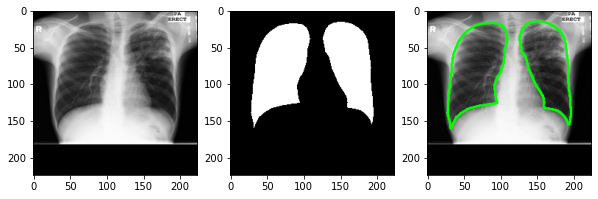

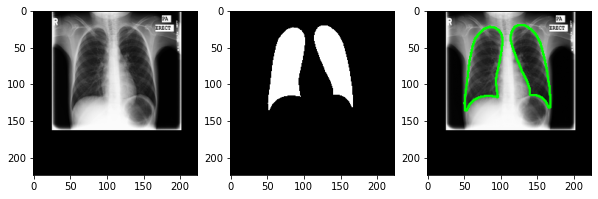

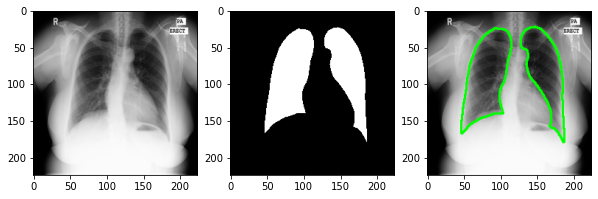

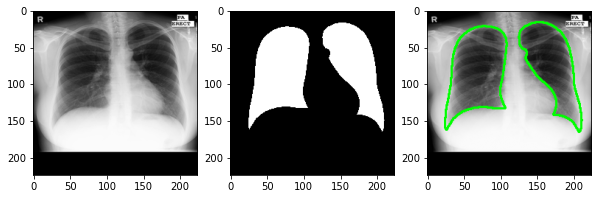

In [6]:
for fn in rndImgs:
    img = Image.open(os.path.join(path2img, fn))
    annt_edges = Image.open(os.path.join(path2mask, fn))
    mask = ndi.binary_fill_holes(annt_edges)
    plt.figure(figsize=(10,15))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap="gray")
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 3, 3)
    show_img_mask(img, mask)

In [7]:
import random
import cv2
import albumentations as A

# from albumentations import (
# HorizontalFlip,
# VerticalFlip,
# Compose,
# Resize
# )

In [8]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image, cmap = 'gray')
        ax[1].imshow(mask, cmap = 'gray')
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image, cmap = 'gray')
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask, cmap = 'gray')
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image, cmap = 'gray')
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask, cmap = 'gray')
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)


In [9]:
image = cv2.imread(os.path.join(path2img,rndImgs[2]), cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(os.path.join(path2mask,rndImgs[2]), cv2.IMREAD_GRAYSCALE)

In [10]:
original_height, original_width = image.shape[:2]

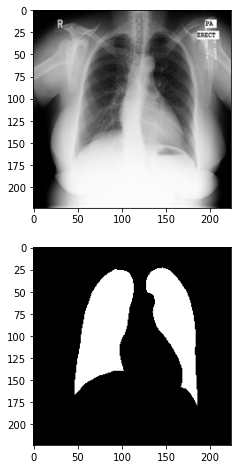

In [11]:
#original
visualize(image, mask)

(224, 224) (224, 224)


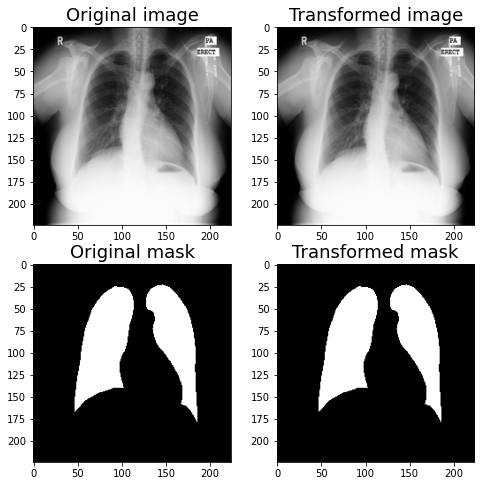

In [12]:
aug = A.PadIfNeeded(min_height=224, min_width=224, p=1)

augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)

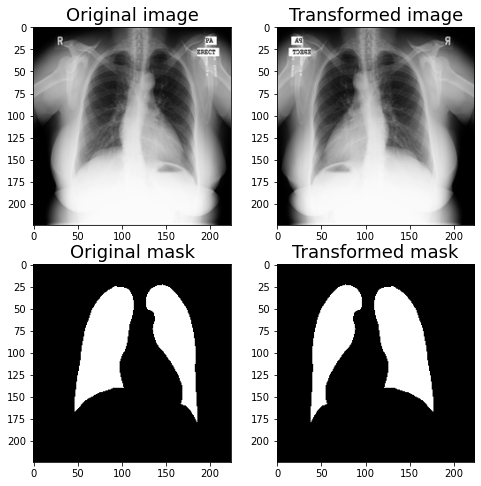

In [13]:
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

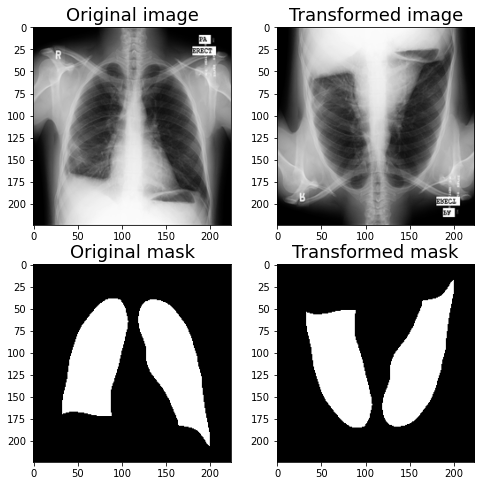

In [68]:


aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)



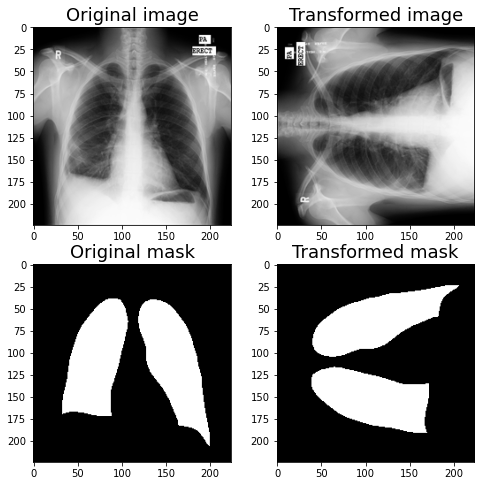

In [69]:


aug = A.RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)



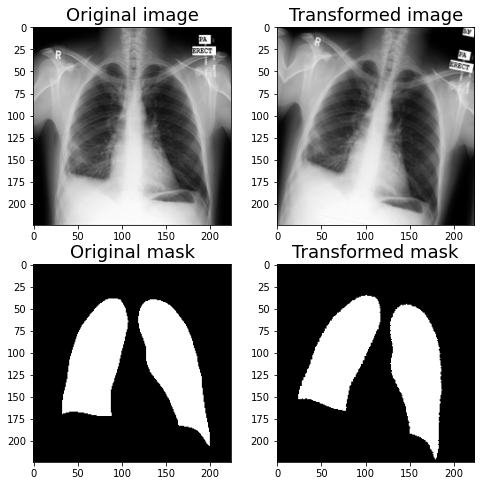

In [72]:
aug = A.Rotate((-30,30), p = 1)
augmented = aug(image=image, mask=mask)
image_rot = augmented['image']
mask_rot = augmented['mask']
visualize(image_rot, mask_rot, original_image=image, original_mask=mask)



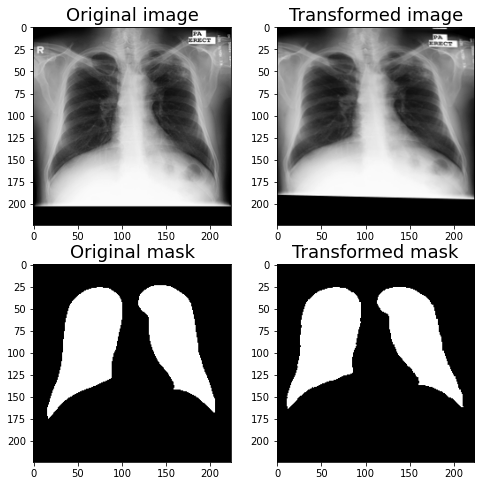

In [17]:


aug = A.ElasticTransform(p=1, alpha=1, sigma=50, alpha_affine=10)
augmented = aug(image=image, mask=mask)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize(image_elastic, mask_elastic, original_image=image, original_mask=mask)



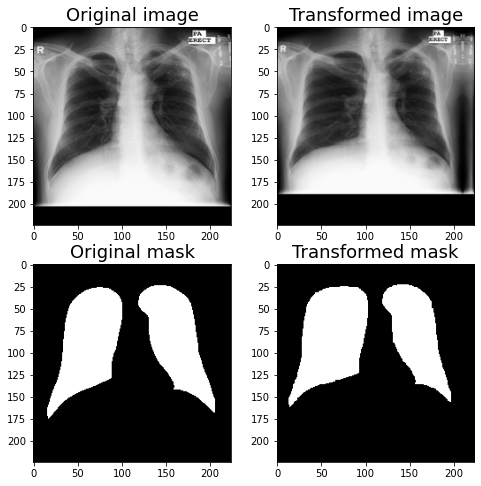

In [20]:
aug = A.GridDistortion(p=1)
# random.seed(7)
augmented = aug(image=image, mask=mask)
image_grid = augmented['image']
mask_grid = augmented['mask']
visualize(image_grid, mask_grid, original_image=image, original_mask=mask)

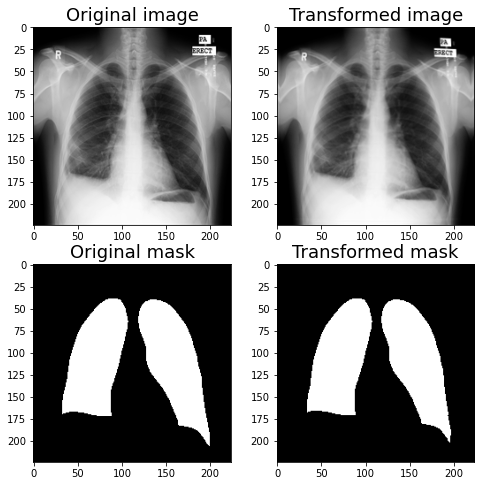

In [105]:
aug = A.OpticalDistortion(distort_limit=0.8, shift_limit=0.6, p=1)

augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visualize(image_optical, mask_optical, original_image=image, original_mask=mask)


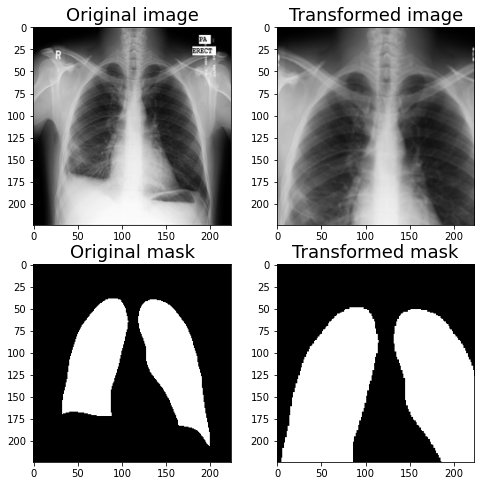

In [96]:
aug = A.RandomSizedCrop(min_max_height=(150, 200), height=original_height, width=original_width, p=1)

# random.seed(7)
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

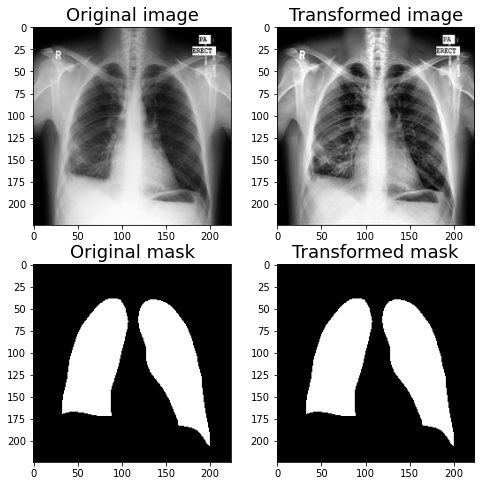

In [99]:
aug = A.CLAHE(p=0.8)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)


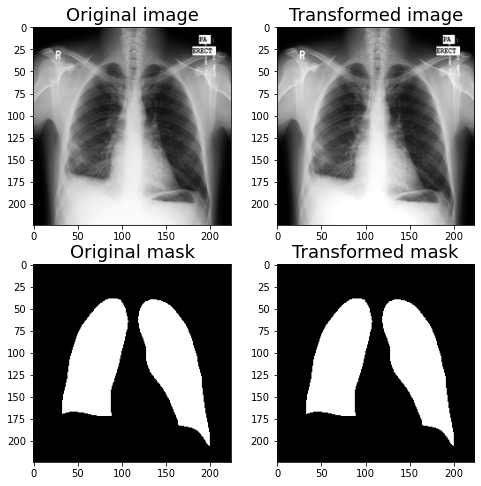

In [101]:
aug = A.RandomBrightnessContrast(p=1)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)


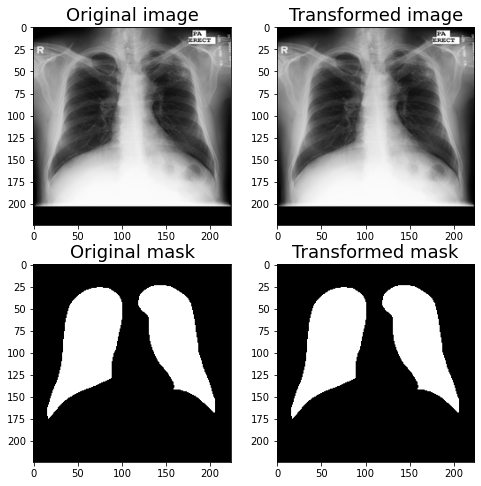

In [31]:
aug = A.RandomGamma(p = 1)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)




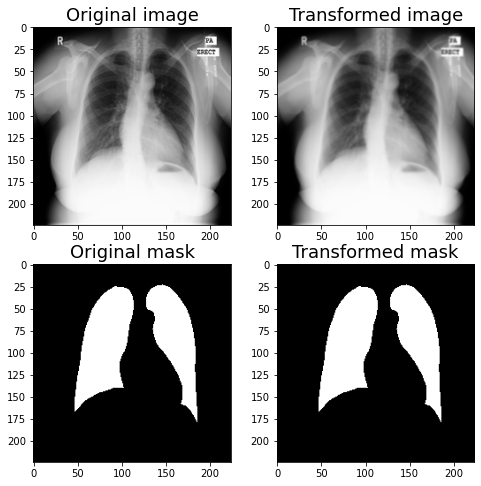

In [14]:
aug = A.GaussianBlur(p = 1)
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)


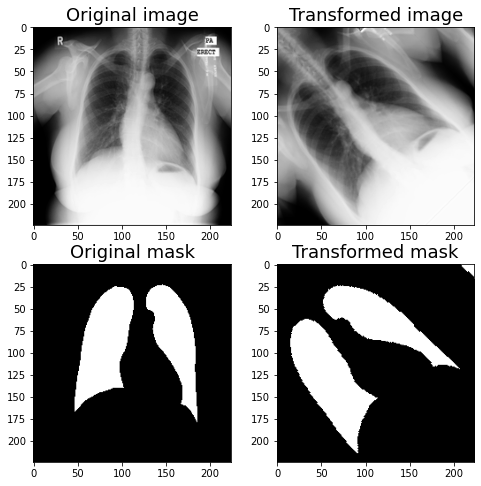

In [16]:
aug = A.ShiftScaleRotate()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)


In [32]:
train_transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Rotate((-30,30), p = 0.5),
    A.ElasticTransform(p=0.5, alpha=1, sigma=50, alpha_affine=10),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.3),
    A.GridDistortion(p=0.5),
    A.OpticalDistortion(distort_limit=0.8, shift_limit=0.6, p=1),
    A.RandomSizedCrop(min_max_height=(150, 200), height=224, width=224, p=0.5),
    A.CLAHE(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p = 0.5),
#     A.Normalize()
        ])